Dataset berisi dua gambar yang diambil pada dua panjang gelombang (biru dan merah) dari kromosom metafasik manusia (pewarnaan DAPI) yang dihibridisasi dengan probe telomerik berlabel Cy3. Kedua gambar tersebut dapat digabungkan menjadi gambar berwarna.

#### Install and imports

In [1]:
!pip install imutils

In [1]:
from skimage import segmentation as skg
from matplotlib import pyplot as plt
from subprocess import check_output
from skimage.measure import label
from scipy import ndimage as nd
from skimage import io
import skimage as sk
import numpy as np
import itertools
import h5py
import sys
import cv2
import pandas as pd
import cv2

import imutils
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import random

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
cy3_12 = plt.imread('./data/Cy3.tif')[50:900,300:1150]
dapi_12 = plt.imread('./data/DAPI.tif')[50:900,300:1150]

#### See data

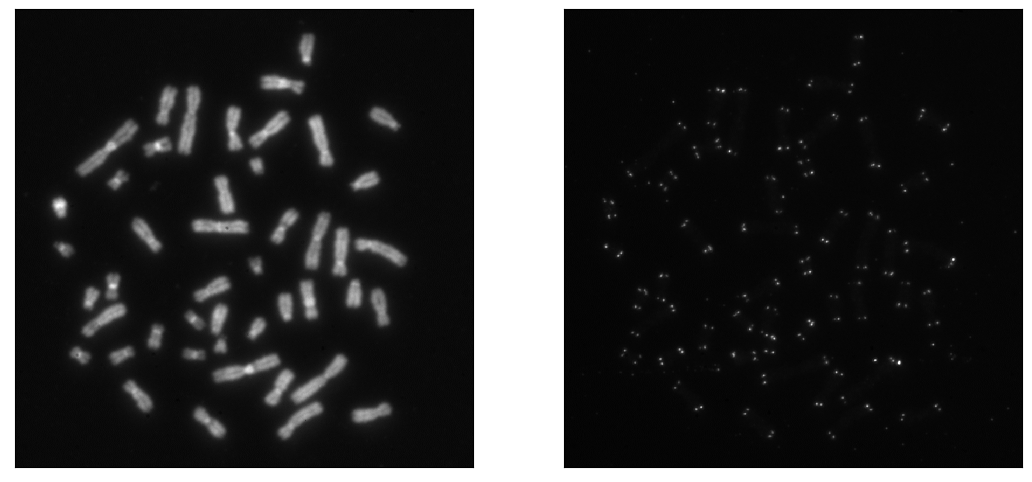

In [3]:
plt.figure(figsize=(13, 15))
plt.subplot(121, xticks=[], yticks=[])
plt.imshow(dapi_12,  interpolation = 'nearest', cmap=plt.cm.gray)
plt.subplot(122,xticks=[], yticks=[])
plt.imshow(cy3_12, interpolation = 'nearest', cmap=plt.cm.gray)

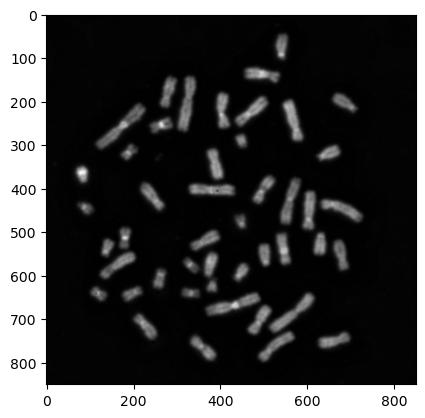

In [5]:
# membentuk kernel
kernel100 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
kernel18 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
# dilakukan tophat
dapi_cv = cv2.morphologyEx(np.uint8(dapi_12/16.0), cv2.MORPH_TOPHAT, kernel100)
cy3_cv = cv2.morphologyEx(np.uint8(cy3_12/16.0), cv2.MORPH_TOPHAT, kernel18)

plt.imshow(dapi_cv, cmap='gray')

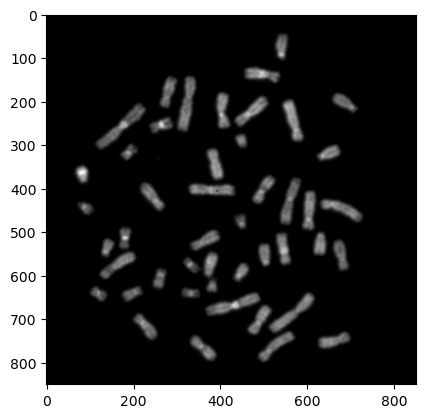

In [6]:
def set_background_to_zero(dapi_cv, cy3_cv):
        d = 1.0*dapi_cv - 5
        d[d <0] = 0
        d = np.uint8(d)

        c = 1.0*cy3_cv - 5
        c[c<0] = 0
        c = np.uint8(c)
        
        return d, c

dapi_set_back, cy3_back = set_background_to_zero(dapi_cv, cy3_cv)

plt.imshow(dapi_set_back, cmap="gray")

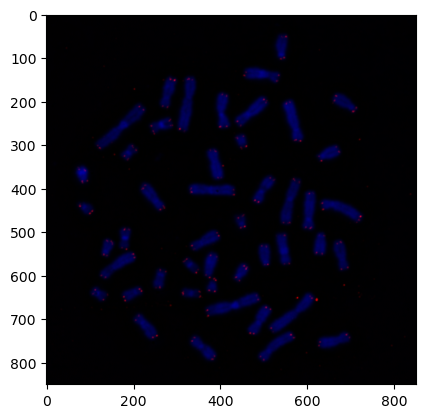

In [7]:
red = np.uint8(cy3_cv)
green = np.zeros(cy3_cv.shape, dtype=np.uint8)
blue = np.uint8(dapi_cv)

color = np.dstack((red, green, blue))

plt.imshow(color, cmap='gray')

C:\Users\tama\AppData\Local\Temp\ipykernel_34688\1391409580.py:2: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))


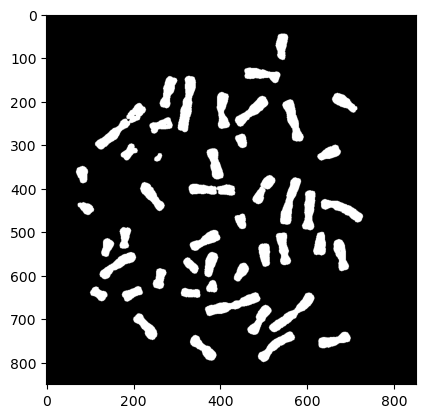

In [8]:
seg = cv2.adaptiveThreshold(dapi_cv, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 0)
seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))

plt.imshow(seg, cmap='gray')

C:\Users\tama\AppData\Local\Temp\ipykernel_34688\272769635.py:1: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see clear_border documentation for more details. Please use out argument instead.
  sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)


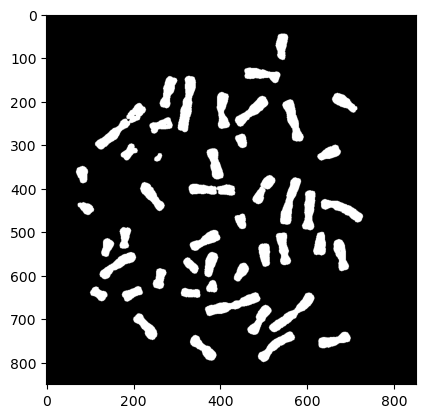

In [9]:
sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)
plt.imshow(seg, cmap='gray')

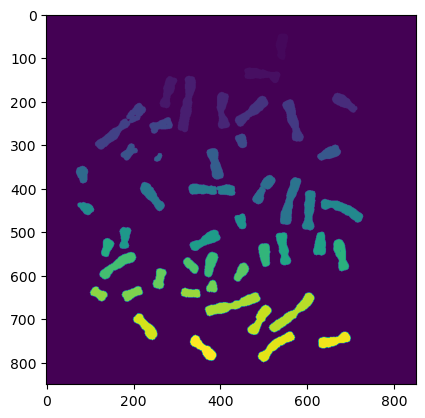

In [10]:
labels = label(seg)

plt.imshow(labels)

In [11]:
locations = nd.find_objects(labels)
print(len(locations))

47


In [12]:
i=1
extracted_images = []
for loc in locations:
    lab_image = np.copy(labels[loc])
    grey_image = np.copy(seg[loc])
    print(i)
    print(lab_image)
    print(grey_image)
    
    lab_image[lab_image != i] = 0
    grey_image[lab_image != i] = 0
    extracted_images.append(grey_image)
    i+=i

1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False 

In [13]:
extracted_images

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [14]:
def extractParticles_2(greyIm, LabIm):
        GreyImg = greyIm
        LabelImg= LabIm
        
        locations = nd.find_objects(LabelImg)
        
        i=1
        extracted_images = []
        for loc in locations:
            lab_image = np.copy(LabelImg[loc])
            grey_image = np.copy(GreyImg[loc])
            
            lab_image[lab_image != i] = 0
            grey_image[lab_image != i] = 0
            extracted_images.append(grey_image)
            i=i+1
        
        return extracted_images

def ResizeImages(ImList):
        '''Find the largest width and height of images belonging to a list.
        Return a list of images of same width/height
        '''
        maxwidth=0
        maxheight=0
        if len(np.shape(ImList[0]))==3:
            components = np.shape(ImList[0])[2]
        imtype = ImList[0].dtype
        
        for i in range(len(ImList)):
            width=np.shape(ImList[i])[1]#width=column
            height=np.shape(ImList[i])[0]#height=line
            #print "width:height",width,":",height
            if width>maxwidth:maxwidth=width
            if height>maxheight:maxheight=height
        #print "maxwidth:maxheight",maxwidth,":",maxheight
        NewList=[]
        for i in range(0,len(ImList)):
            width=np.shape(ImList[i])[1]
            height=np.shape(ImList[i])[0]

            diffw=maxwidth-width
            startw=round(diffw/2)
            diffh=maxheight-height
            starth=int(round(diffh/2))
            startw=int(round(diffw/2))
            if len(np.shape(ImList[0]))==3:
                newIm=np.zeros((maxheight,maxwidth,components), dtype=imtype)
                newIm[starth:starth+height,startw:startw+width,:]=ImList[i][:,:,:]
                NewList.append(newIm)
            if len(np.shape(ImList[0]))==2:
                newIm=np.zeros((maxheight,maxwidth), dtype=imtype)
                newIm[starth:starth+height,startw:startw+width]=ImList[i][:,:]
                NewList.append(newIm)
        return NewList

seg = cv2.adaptiveThreshold(dapi_cv, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 0)
seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))
sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)
labeled = label(seg)

dapi_cy3 = (1.0*dapi_cv + 1.0*cy3_cv)/2
combined = np.uint8(255*sk.exposure.rescale_intensity(dapi_cy3))

single_chroms = extractParticles_2(combined, labeled)
resized_chroms = ResizeImages(single_chroms)

singles_rgb = extractParticles_2(color, labeled)
resized_rgb = ResizeImages(singles_rgb)


C:\Users\tama\AppData\Local\Temp\ipykernel_34688\3215329164.py:58: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))
C:\Users\tama\AppData\Local\Temp\ipykernel_34688\3215329164.py:59: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see clear_border documentation for more details. Please use out argument instead.
  sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)


In [15]:
def extractParticles_2(greyIm, LabIm):
        GreyImg = greyIm
        LabelImg= LabIm
        
        locations = nd.find_objects(LabelImg)
        print(locations)

extractParticles_2()
        

TypeError: extractParticles_2() missing 2 required positional arguments: 'greyIm' and 'LabIm'

In [ ]:
single_chroms

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

#### implemanrasi

In [4]:
class SegmentChromosomes():
    def __init__(self, dapi_12, cy3_12, debug=False):
        self.debug = debug
        self.dapi_12 = dapi_12
        self.cy3_12 = cy3_12
        # create kernel
        self.kernel100 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
        self.kernel18 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
        # tophat mrophologi
        dapi_cv = cv2.morphologyEx(np.uint8(self.dapi_12/16.0), cv2.MORPH_TOPHAT, self.kernel100)
        cy3_cv = cv2.morphologyEx(np.uint8(self.cy3_12/16.0), cv2.MORPH_TOPHAT, self.kernel18)
        
        # Algorithm

        # menghitamkan background agar bernilai 0
        self.dapi_cv, self.cy3_cv = self.set_background_to_zero(dapi_cv, cy3_cv)
        self.combine_to_rgb()
        
        # Start chromosome segmentation
        self.all_chromosomes = self.chromosome_segmentation()
        
        self.from_chromo_get_cnts()
    
    @staticmethod
    def set_background_to_zero(dapi_cv, cy3_cv):
        d = 1.0*dapi_cv - 5
        d[d <0] = 0
        d = np.uint8(d)

        c = 1.0*cy3_cv - 5
        c[c<0] = 0
        c = np.uint8(c)
        
        return d, c
        
    def combine_to_rgb(self):
        red = np.uint8(self.cy3_cv)
        green = np.zeros(self.cy3_cv.shape, dtype=np.uint8)
        blue = np.uint8(self.dapi_cv)

        self.color = np.dstack((red, green, blue))

        if self.debug:
            #print('combine to rgb')
            plt.figure(figsize=(10,10))
            plt.subplot(111, xticks=[], yticks=[])
            plt.imshow(self.color)
    
    def chromosome_segmentation(self):
        seg = cv2.adaptiveThreshold(self.dapi_cv, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 0)
        seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))
        sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)
        self.labeled = label(seg)
        
        self.dapi_cy3 = (1.0*self.dapi_cv + 1.0*self.cy3_cv)/2
        combined = np.uint8(255*sk.exposure.rescale_intensity(self.dapi_cy3))
        
        #pengambilan object
        single_chroms = SegmentChromosomes.extractParticles_2(combined, self.labeled)
        #print(len(np.shape(single_chroms[0])))
        resized_chroms = SegmentChromosomes.ResizeImages(single_chroms)#resize

        #pengambilan object
        singles_rgb = SegmentChromosomes.extractParticles_2(self.color, self.labeled)
        #print(singles_rgb)
        resized_rgb = SegmentChromosomes.ResizeImages(singles_rgb)#resize
        #print(resized_rgb)
        # mengurutkan berdasarkan urutan object
        ordered_chroms = self.order_chromosomes_by_size(resized_chroms)
        
        return ordered_chroms

    def order_chromosomes_by_size(self, resized_chroms):
        singles = {}
        for chrom in resized_chroms:
            size = np.sum(chrom > 0)
            singles[size] = chrom
        
        keys = singles.keys()
        sorted_size = sorted(keys) # mengurutkan 
        
        ordered_chromosomes = []
        for i, siz in enumerate(sorted_size):
            ordered_chromosomes.append(singles[siz])
        
        #print(ordered_chromosomes)
        if self.debug:
            #print('order_chromosomes_by_size')
            plt.figure(figsize=(12, 12))
            for i, siz in enumerate(sorted_size):
                plt.subplot(8,6,i+1, xticks=[],yticks=[])
                plt.imshow(singles[siz], interpolation='nearest', cmap = plt.cm.Greys_r, vmin=0,vmax=150)
                plt.title(str(siz))
        
        return ordered_chromosomes

    def from_chromo_get_cnts(self):
        for image in self.all_chromosomes:
            image_copy = image.copy()
            _, thresh = cv2.threshold(image, image.min(), 255, cv2.THRESH_BINARY)
            cnts, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
            
            # Fit bounding rectangle around contour
            rotatedRect = cv2.minAreaRect(c)
            angle = SegmentChromosomes.compute_angle(rotatedRect)
            image_rotated = imutils.rotate(image, angle)
            
            if self.debug:
                #print("from_chromo_get_cnts")
                fig, (ax1, ax2) = plt.subplots(1, 2)
                ax1.imshow(image)
                ax2.imshow(image_rotated)
                plt.show()
    
    # mengatur rotasi
    @staticmethod
    def compute_angle(rotatedRect):
        usedEdge = (rotatedRect[1][0] - rotatedRect[0][0], rotatedRect[1][1] - rotatedRect[0][1])
        reference = (1,0)
        
        angle = 180.0/np.pi * np.arccos(usedEdge[0] / (np.abs(reference) * np.abs(usedEdge)))[0]
        
        return angle
    
    @staticmethod
    def cart2pol(x, y):
        theta = np.arctan2(y, x)
        rho = np.hypot(x, y)
        return theta, rho

    @staticmethod
    def pol2cart(theta, rho):
        x = rho * np.cos(theta)
        y = rho * np.sin(theta)
        return x, y

    @staticmethod
    def extractParticles_2(greyIm, LabIm):
        #print 'start', greyIm.dtype, LabIm.dtype
        GreyImg = greyIm
        LabelImg= LabIm
        
        #plt.rcParams["figure.figsize"] = (12, 12)
        #plt.imshow(GreyImg)
        #plt.show()
        #print("Printed Grey")

        #plt.imshow(LabelImg)
        #plt.show()
        #print("Printed Label")
        
        locations = nd.find_objects(LabelImg)
        
        i=1
        extracted_images = []
        for loc in locations:
            lab_image = np.copy(LabelImg[loc])
            grey_image = np.copy(GreyImg[loc])

            lab_image[lab_image != i] = 0
            grey_image[lab_image != i] = 0
            extracted_images.append(grey_image)
            i=i+1
        
        return extracted_images
    
    @staticmethod
    def ResizeImages(ImList):
        maxwidth=0
        maxheight=0
        if len(np.shape(ImList[0]))==3:
            components = np.shape(ImList[0])[2]
        imtype = ImList[0].dtype
        
        for i in range(len(ImList)):
            width=np.shape(ImList[i])[1]#width=column
            height=np.shape(ImList[i])[0]#height=line
            #print(f"width:height,{width, height}")
            if width>maxwidth:maxwidth=width
            if height>maxheight:maxheight=height
        #print "maxwidth:maxheight",maxwidth,":",maxheight
        NewList=[]
        for i in range(0,len(ImList)):
            width=np.shape(ImList[i])[1]
            height=np.shape(ImList[i])[0]

            diffw=maxwidth-width
            startw=round(diffw/2)
            diffh=maxheight-height
            starth=int(round(diffh/2))
            startw=int(round(diffw/2))
            if len(np.shape(ImList[0]))==3:
                newIm=np.zeros((maxheight,maxwidth,components), dtype=imtype)
                newIm[starth:starth+height,startw:startw+width,:]=ImList[i][:,:,:]
                NewList.append(newIm)
            if len(np.shape(ImList[0]))==2:
                newIm=np.zeros((maxheight,maxwidth), dtype=imtype)
                newIm[starth:starth+height,startw:startw+width]=ImList[i][:,:]
                #print(newIm.shape)
                NewList.append(newIm)
        return NewList  

    
G = SegmentChromosomes(dapi_12, cy3_12)

C:\Users\tama\AppData\Local\Temp\ipykernel_21916\3349127793.py:51: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  seg = sk.morphology.binary_opening(seg, selem = sk.morphology.disk(5))
C:\Users\tama\AppData\Local\Temp\ipykernel_21916\3349127793.py:52: FutureWarning: in_place argument is deprecated and will be removed in version 1.0. To avoid this warning, please do not use the in_place argument. Please see clear_border documentation for more details. Please use out argument instead.
  sk.segmentation.clear_border(seg, buffer_size=3, in_place= True)
C:\Users\tama\AppData\Local\Temp\ipykernel_21916\3349127793.py:122: RuntimeWarning: divide by zero encountered in true_divide
  angle = 180.0/np.pi * np.arccos(usedEdge[0] / (np.abs(reference) * np.abs(usedEdge)))[0]
C:\Users\tama\AppData\Local\Temp\ipykernel_21916\3349127793.py:122: RuntimeWarning: invalid value encountered in arccos
  angle = 1

#### Generate Overlapping

In [5]:
import numpy as np

def ResizeImages2(ImList):
    maxwidth = 128
    maxheight = 128
    if len(np.shape(ImList[0])) == 3:
        components = np.shape(ImList[0])[2]
    imtype = ImList[0].dtype

    for i in range(len(ImList)):
        width = np.shape(ImList[i])[1]
        height = np.shape(ImList[i])[0]
        if width > maxwidth:
            maxwidth = width
        if height > maxheight:
            maxheight = height

    NewList = []
    for i in range(0, len(ImList)):
        width = np.shape(ImList[i])[1]
        height = np.shape(ImList[i])[0]

        startw = (maxwidth - width) // 2
        starth = (maxheight - height) // 2

        if len(np.shape(ImList[0])) == 3:
            newIm = np.zeros((maxheight, maxwidth, components), dtype=imtype)
            newIm[starth:starth + height, startw:startw + width, :] = ImList[i][:, :, :]
            NewList.append(newIm.astype(imtype))
        if len(np.shape(ImList[0])) == 2:
            newIm = np.zeros((maxheight, maxwidth), dtype=imtype)
            newIm[starth:starth + height, startw:startw + width] = ImList[i][:, :]
            NewList.append(newIm.astype(imtype))
    return NewList


In [6]:
#create bonding 
def clip_img_to_bounding_box(img):
    bb = nd.find_objects(img[:,:,-1]>0)
    slice0 = bb[0][0]
    slice1= bb[0][1]
    clip = img[slice0,slice1]
    return clip

def patch_to_square(image, seepatch=False):
    if seepatch==True:
        s1=2
        s2=3
    else:
        s1=0
        s2=0
    row = image.shape[0]
    col = image.shape[1]
    Hyp = int(np.ceil(np.sqrt(row**2+col**2)))+1
    drow = int(np.ceil(Hyp-row)/2)
    dcol = int(np.ceil(Hyp-col)/2)
    patch_h= s1*np.ones((row,dcol),dtype=int)
    patch_v= s2*np.ones((drow,col+2*(dcol)), dtype=int)
    e2 = np.hstack((patch_h, image, patch_h))
    return np.vstack((patch_v,e2,patch_v))

#rotate setiap image
def rotated_images(image, step_angle, half_turn = False):
    if half_turn == True:
        angle_max = 180
    else:
        angle_max = 360
    angles = np.arange(0, angle_max, step_angle)
    return [clip_img_to_bounding_box(nd.rotate(image, rotation)) for rotation in angles]


def collection_of_pairs_of_rotated_images(image1, image2, step_angle=10, half_turn=False):

    r_images1 = rotated_images(image1, step_angle, half_turn)
    r_images2 = rotated_images(image2, step_angle, half_turn)

    pairs = itertools.product(r_images1, r_images2)# penggabungan
    #print type(next(pairs))
    #print next(pairs)
    r_pairs = [SegmentChromosomes.ResizeImages([p[0],p[1]]) for p in pairs]
    return r_pairs

def translate(image, vector):
    #print 'vector',vector, vector[0]
    image = np.roll(image, int(vector[0]), axis = 0)
    image = np.roll(image, int(vector[1]), axis = 1)
    return image

#diubang ke bentuk 3 channel dari 2 channel
def add_mask_to_image(image, mask_value = 1):
    image = np.dstack((image, mask_value*(image>0)))
    return image

def merge_and_roll(still_img, move_img, row, col, clip=True):
    '''row, col: assume two numbers in [0,1]
    images:last component supposed to be a mask
    '''
    u=row
    v=col

    target = np.copy(still_img)
    source = np.copy(move_img)
    #print target.shape, source.shape

    #bounding boxes
    bb0 = nd.find_objects(target[:,:,-1]>0)
    bb1 = nd.find_objects(source[:,:,-1]>0)
    #won't work if more than two components C0 and C1
    C_0 = target[bb0[0][0],bb0[0][1]]
    C_1 = source[bb1[0][0],bb1[0][1]]
    #col, row
    c1 = C_1.shape[1]
    r1 = C_1.shape[0]
    c0 = C_0.shape[1]
    r0 = C_0.shape[0]
    comp = C_0.shape[-1]
    #print 'c1,r1,c0,r0, comp:',c1,r1,c0,r0, comp

    still = np.zeros((r1+2*r0,c1+2*c0,comp),dtype=int)
    still[r0+1:r0+r1+1,c0+1:c0+c1+1]= C_1
    move = np.zeros(still.shape, dtype=int)
    move[:r0,:c0]=C_0
    vector = u*(still.shape[0]-r0),v*(still.shape[1]-c0)
    #print r1, c1, vector
    move = translate(move, vector)
    #merge_shape =
    #figsize(10,8)
    merge = move+still
    if clip==False:
        return merge
    else:
        return clip_img_to_bounding_box(merge)


def overlapping_generator(image1, image2, mask1 = 1, mask2 = 2, 
                          rotation_step = 30, translations_number = 9,turn = False):

    c0 = clip_img_to_bounding_box(add_mask_to_image(image1, mask_value = mask1))
    c1 = clip_img_to_bounding_box(add_mask_to_image(image2,mask_value = mask2))
    
    CR = collection_of_pairs_of_rotated_images(c0, c1, step_angle = rotation_step, half_turn= turn)

    #Prepare translation vectors u (same on rows and lines)
    u = np.linspace(0,1,num = translations_number, endpoint = True)[1:-1]
    #v = np.arange(0,1,0.2)[1:]
    P = [t for t in itertools.product(u,u)]

    overlappings = []
    #Take a pair of images
    for pair_of_images in CR:# CR[::3] Just play with a subset
        im1 = pair_of_images[0]
        im2 = pair_of_images[1]
        #Now translate one image relative to the other one
        for t in P:#P[::3]Just play with a subset
            u = t[0]
            v = t[1]
            #translations = [merge_and_roll(im1, im2, u, v) for t in P]
            #overlappings.append(translations)
            overlappings.append(merge_and_roll(im1, im2, u, v))

    overlapping_chrom_learning_set = ResizeImages2(overlappings)
    return overlapping_chrom_learning_set

990  pairs of chromosomes generated
5000
2159  examples
(2159, 128, 128, 2)
Shuffling images
(2159, 128, 128, 2)
Each image (grey+ground truth) weights: 128.1328125  kbytes
Size of stacked images  269.8751449584961  Mo


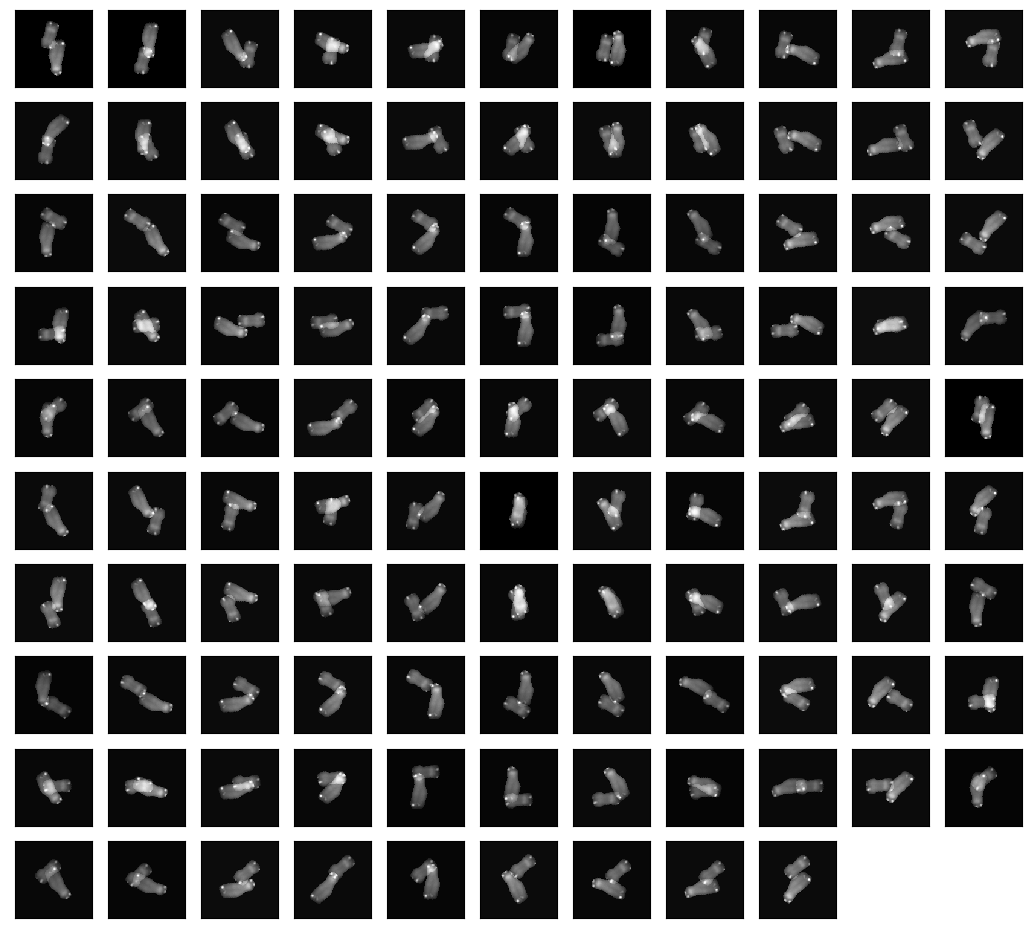

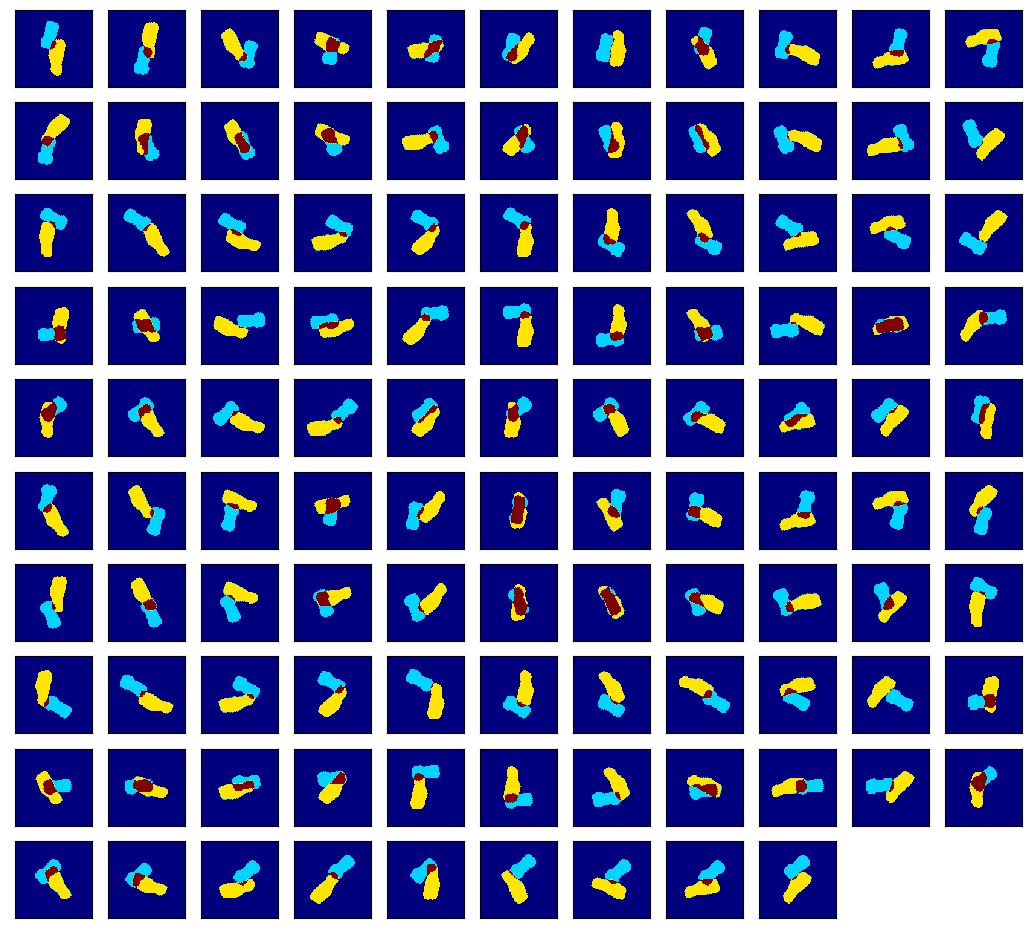

In [7]:
resized_chroms = G.all_chromosomes

all_pairs = []
for pair in itertools.combinations(resized_chroms, 2): # mengkombinasi
    area1 = np.sum(pair[0]>0)
    area2 = np.sum(pair[1]>0)
    all_pairs.append(((area1, area2), pair))
print(len(all_pairs),' pairs of chromosomes generated')

candidates_overlapps = []
onepair = all_pairs[499] # mengambil kombinasi
for pair in onepair: # all_pairs[] DO NOT  HOLD in RAM
    im1 = pair[0]
    im2 = pair[1]
    overl = overlapping_generator(im1,im2,rotation_step=36, translations_number=7, turn = False)
    #print(candidates_overlapps)
    candidates_overlapps = candidates_overlapps + overl # penggabungan
    
print(len(candidates_overlapps))
#print(candidates_overlapps[0])

# Remove candidates that are not touching or overlapping
overlapps = []
for ovlp in candidates_overlapps:
    if np.any(ovlp[:,:,1][:,:] == 3):
        overlapps.append(ovlp)
print(len(overlapps),' examples')

stacked = io.concatenate_images(overlapps)
print(stacked.shape)
print('Shuffling images')
np.random.shuffle(stacked)
print(stacked.shape)

kilo_byte = sys.getsizeof(overlapps[0])/1024
print('Each image (grey+ground truth) weights:',kilo_byte,' kbytes')
print('Size of stacked images ',sys.getsizeof(stacked)/1024/1024,' Mo')

# Sample
plt.figure(figsize=(13, 13))
plt.title("Samples for overlapping chromosomes generated")
for i, im in enumerate(overlapps[::20]):
    plt.subplot(11,11,i+1, xticks=[],yticks=[])
    plt.imshow(im[:,:,0], interpolation='nearest', cmap = plt.cm.Greys_r)

# See ground_truth
plt.figure(figsize=(13, 13))
plt.title("Ground truth")
for i, im in enumerate(overlapps[::20]):
    plt.subplot(11,11,i+1, xticks=[],yticks=[])
    plt.imshow(im[:,:,1], interpolation='nearest', cmap='jet')

In [10]:
len(overlapps)

2159

In [ ]:
plt.imsave

In [17]:
for i, im in enumerate(overlapps[:1000]):
    plt.imsave(f'./data/ground/{i}.png', im[:,:,1])
    plt.imsave(f'./data/image/{i}.png', im[:,:,0])

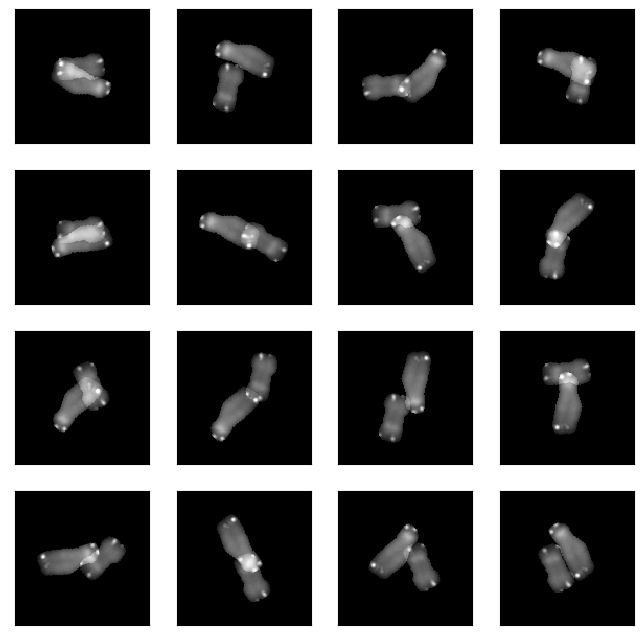

In [10]:
plt.figure(figsize=(8, 8))

for i in range(0,16):
    plt.subplot(4,4,i+1, xticks=[],yticks=[])
    im = stacked[i,:,:,0]
    plt.imshow(im, interpolation='nearest', cmap = plt.cm.Greys_r,vmin=0, vmax=205)

In [14]:
import numpy as np

# Matriks contoh
labels = np.array([[2, 1, 1],
                   [1, 1, 2],
                   [1, 2, 1]])

# Koordinat tengah matriks 3x3
x = 1
y = 1

# Mendapatkan label yang dicari
temp_label = 1

# Menggunakan np.where untuk mendapatkan indeks baris dan kolom
indices = np.where(labels[(x-1):(x+2), (y-1):(y+2)] == temp_label)
print(indices)
# Mengakses elemen-elemen dalam matriks berdasarkan indeks yang diberikan
for i in range(len(indices[0])):
    row = indices[0][i]
    col = indices[1][i]
    print(f"Label {temp_label} ditemukan pada baris {row} dan kolom {col}")


(array([0, 0, 1, 1, 2, 2], dtype=int64), array([1, 2, 0, 1, 0, 2], dtype=int64))
Label 1 ditemukan pada baris 0 dan kolom 1
Label 1 ditemukan pada baris 0 dan kolom 2
Label 1 ditemukan pada baris 1 dan kolom 0
Label 1 ditemukan pada baris 1 dan kolom 1
Label 1 ditemukan pada baris 2 dan kolom 0
Label 1 ditemukan pada baris 2 dan kolom 2


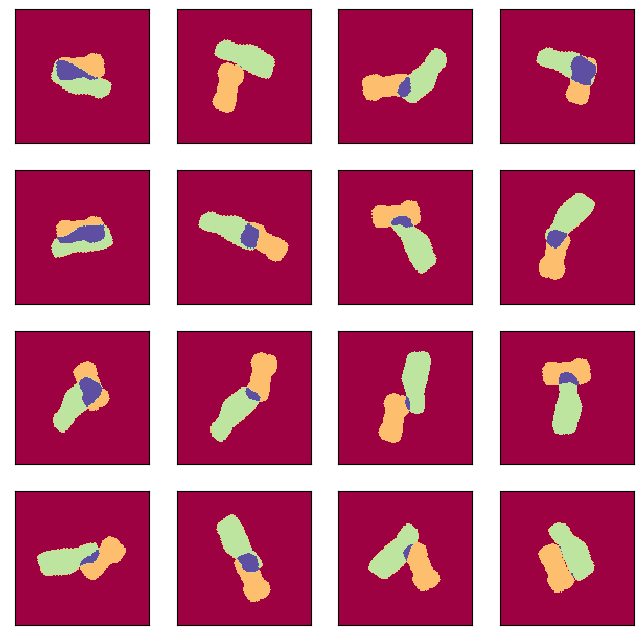

In [11]:
plt.figure(figsize=(8, 8))
for i in range(0,16):
    plt.subplot(4,4,i+1, xticks=[],yticks=[])
    im = stacked[i,:,:,1]
    plt.imshow(im, interpolation='nearest', cmap = plt.cm.Spectral,vmin=0, vmax=3)

In [12]:
import h5py

h5f = h5py.File('stacked.h5', 'w')
h5f.create_dataset('dataset_1', data= stacked, compression='gzip', compression_opts=9)
h5f.close()

In [ ]:
#save
import pickle

# Menyimpan overlapps ke dalam file
with open('./data/overlapps.pkl', 'wb') as file:
    pickle.dump(overlapps, file)

#### coret

In [ ]:
def ResizeImages(ImList):
    maxwidth=0
    maxheight=0
    if len(np.shape(ImList[0]))==3:
        components = np.shape(ImList[0])[2]
    imtype = ImList[0].dtype
        
    for i in range(len(ImList)):
        width=np.shape(ImList[i])[1]#width=column
        height=np.shape(ImList[i])[0]#height=line
            #print(f"width:height,{width, height}")
        if width>maxwidth:maxwidth=width
        if height>maxheight:maxheight=height
        #print "maxwidth:maxheight",maxwidth,":",maxheight
    NewList=[]
    for i in range(0,len(ImList)):
        width=np.shape(ImList[i])[1]
        height=np.shape(ImList[i])[0]

        diffw=maxwidth-width
        startw=round(diffw/2)
        diffh=maxheight-height
        starth=int(round(diffh/2))
        startw=int(round(diffw/2))
        if len(np.shape(ImList[0]))==3:
            newIm=np.zeros((maxheight,maxwidth,components), dtype=imtype)
            newIm[starth:starth+height,startw:startw+width,:]=ImList[i][:,:,:]
            NewList.append(newIm)
        if len(np.shape(ImList[0]))==2:
            newIm=np.zeros((maxheight,maxwidth), dtype=imtype)
            newIm[starth:starth+height,startw:startw+width]=ImList[i][:,:]
            print(newIm.shape)
            NewList.append(newIm)
    return NewList  

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 882 output values where the mask is true